In [2]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import variation
from urllib.request import urlopen
from urllib.parse import quote
from rdkit import Chem
from rdkit.Chem.Descriptors import MolWt
from collections import Counter

In [2]:
files_dir = glob.glob(r"C:\Users\zcemg08\PycharmProjects\biofuels\raw_data\phys_prop\*.csv")

In [3]:
df0 = pd.read_csv(files_dir[0], encoding= 'unicode_escape')
df1 = pd.read_csv(files_dir[1], encoding= 'unicode_escape')
df2 = pd.read_csv(files_dir[2], encoding= 'unicode_escape')
df3 = pd.read_csv(files_dir[3], encoding= 'unicode_escape')
df4 = pd.read_csv(files_dir[4], encoding= 'unicode_escape')
df5 = pd.read_csv(files_dir[5], encoding= 'unicode_escape')

In [4]:
datka = [df0,df1,df2,df3,df4,df5]

df0['UB(mol/L)'] = None 

In [5]:
for item in datka:
    print(list(item))

['NO.', 'Compound', 'Smiles', 'RON', 'MON', 'YSI', '?Hc°(KJ/L)', '?Hc°(KJ/kg)', 'RVP(kPa)', 'Density (g/mL)', 'Boiling Point (K)', 'UB(mol/L)']
['NO.', 'Compound', 'Smiles', 'RON', 'MON', 'YSI', '?Hc°(KJ/L)', '?Hc°(KJ/kg)', 'RVP(kPa)', 'UB(mol/L)', 'Density (g/mL)', 'Boiling Point (K)']
['NO.', 'Compound', 'Smiles', 'RON', 'MON', 'YSI', '?Hc°(KJ/L)', '?Hc°(KJ/kg)', 'RVP(kPa)', 'UB(mol/L)', 'Density (g/mL)', 'Boiling Point (K)']
['NO.', 'Compound', 'Smiles', 'RON', 'MON', 'YSI', '?Hc°(KJ/L)', '?Hc°(KJ/kg)', 'RVP(kPa)', 'UB(mol/L)', 'Density (g/mL)', 'Boiling Point (K)']
['NO.', 'Compound', 'Smiles', 'RON', 'MON', 'YSI', '?Hc°(KJ/L)', '?Hc°(KJ/kg)', 'RVP(kPa)', 'UB(mol/L)', 'Density (g/mL)', 'Boiling Point (K)']
['Species', 'SMILES', 'Formula', 'Unified YSI']


In [6]:
data_ = pd.concat([df0,df1,df2,df3,df4],axis=0)

len_ = 0
for item in datka:
    len_ += len(item)
    print(len_)

313
503
618
733
848
1295


In [7]:
### Merge data

df = pd.concat(datka[:-1])
df = df.drop('NO.',axis=1)
#Drop exact duplicated rows
df = df.drop_duplicates()
#Drop duplicated by Smiles	RON	MON	YSI	?Hc°(KJ/L)	?Hc°(KJ/kg)	RVP(kPa)	Density (g/mL)	Boiling Point (K)
important_columns    = list(df)[1:-1]
df                   = df.drop_duplicates(subset=important_columns)
df                   = df.dropna(subset=['Smiles'])

##### Fuel Properties

(RON)  - representing the antiknock performance 
[1.	Kubic Jr, W.L., et al., Artificial neural network based group contribution method for estimating cetane and octane numbers of hydrocarbons and oxygenated organic compounds. Industrial & Engineering Chemistry Research, 2017. 56(42): p. 12236-12245.]

(YSI)  - describing the emissions of soot
[2.	Das, D.D., et al., Measuring and predicting sooting tendencies of oxygenates, alkanes, alkenes, cycloalkanes, and aromatics on a unified scale. Combustion and Flame, 2018. 190: p. 349-364.

3.	McEnally, Charles S.; Das, Dhrubajyoti D.; Pfefferle, Lisa D., 2017, "Yield Sooting Index Database Volume 2: Sooting Tendencies of a Wide Range of Fuel Compounds on a Unified Scale", https://doi.org/10.7910/DVN/7HGFT8, Harvard Dataverse, V1, UNF:6:n617TMoSmliFFMdXMfOB9w== [fileUNF].]


(DHc)  - combustion heat / evaluating the power performance
[Pan, Y., et al., Predicting the net heat of combustion of organic compounds from molecular structures based on ant colony optimization. Journal of Loss Prevention in the Process Industries, 2011. 24(1): p. 85-89.]


(Density)- [44, A.P.I.R.P. and K.R. Hall, Selected Values of Properties of Hydrocarbons and Related Compounds. 1981: Thermodynamics Research Center.]

(Boiling Point) (K)
[Yaws, C.L., Thermophysical properties of chemicals and hydrocarbons. 2008: William Andrew.]

(RVP)  - Reid vapor pressure / the evaporation performance of gasoline
[Aspen Physical Property System databank.]


(UB)   - the number of unsaturated bonds

#### Alternative datasources - not used in the notebook

1) Boiling point and density:

https://app.knovel.com/web/view/itable/show.v/rcid:kpYHTPPCC4/cid:kt002UT9Q2/viewerType:itble//root_slug:Physical-Properties-and-Refractive-Index/url_slug:physical-properties-refractive?b-q=Yaws%27%20Handbook%20of%20Thermodynamic%20and%20Physical%20Properties%20of%20Chemical%20Compounds&include_synonyms=no&q=Yaws%27%20Handbook%20of%20Thermodynamic%20and%20Physical%20Properties%20of%20Chemical%20Compounds&sort_on=default&start=0&columns=1,3,4,5,6,8,10,12,13


2) Entropy of organic compounds:

https://app.knovel.com/web/view/itable/show.v/rcid:kpYCPDCECD/cid:kt00BKANV1/viewerType:eptble//root_slug:Table-79-Entropy-of-Gas---Organic-Com

In [8]:
df.head(5)

,Compound,Smiles,RON,MON,YSI,?Hc°(KJ/L),?Hc°(KJ/kg),RVP(kPa),Density (g/mL),Boiling Point (K),UB(mol/L)
0,"2,4-Dimethylpentane",CC(C)CC(C)C,86.317222,85.292433,18.964147,29749.93551,44193.53819,20.163661,0.673174,349.689912,None
1,Heptane,CCCCCCC,2.100058,5.788349,15.492068,30434.01910,44842.40477,13.179002,0.678688,365.924403,None
2,"2,2,3-Trimethylbutane",CC(C)(C)C(C)C,106.380839,100.789345,31.332231,29928.10179,44024.11931,27.542545,0.679811,352.273738,None
3,"3,3-Dimethylpentane",CCC(C)(C)CC,88.935130,91.989959,18.105944,30283.40019,44476.16394,22.833933,0.680891,357.408846,None
4,"2,3-Dimethylpentane",CC(C)C(C)CC,88.753001,87.964683,24.657707,29868.56685,44073.29329,17.498149,0.677702,353.830958,None


In [9]:
for col in list(df)[2:]:
    print(col + ' '+ 'number of duplicates = {}'.format(df.duplicated(subset=['Smiles',col]).sum()))

RON number of duplicates = 120
MON number of duplicates = 120
YSI number of duplicates = 120
?Hc°(KJ/L) number of duplicates = 0
?Hc°(KJ/kg) number of duplicates = 0
RVP(kPa) number of duplicates = 120
Density (g/mL) number of duplicates = 120
Boiling Point (K) number of duplicates = 120
UB(mol/L) number of duplicates = 108


In [10]:
def variation_(df):
    return [variation(df[df['Smiles']==x].iloc[:,1]) for x in df[df.duplicated(subset=['Smiles'])]['Smiles'].values]

In [11]:
df_RON     = df[['Smiles','RON']].drop_duplicates()
df_YSI     = df[['Smiles','YSI']].drop_duplicates()
df_comb_h  = df[['Smiles','?Hc°(KJ/kg)']].drop_duplicates()
df_RVP     = df[['Smiles','RVP(kPa)']].drop_duplicates()
df_Density = df[['Smiles','Density (g/mL)']].drop_duplicates()
df_bp      = df[['Smiles','Boiling Point (K)']].drop_duplicates()

Text(0.5, 1.0, 'BP_norm_var')

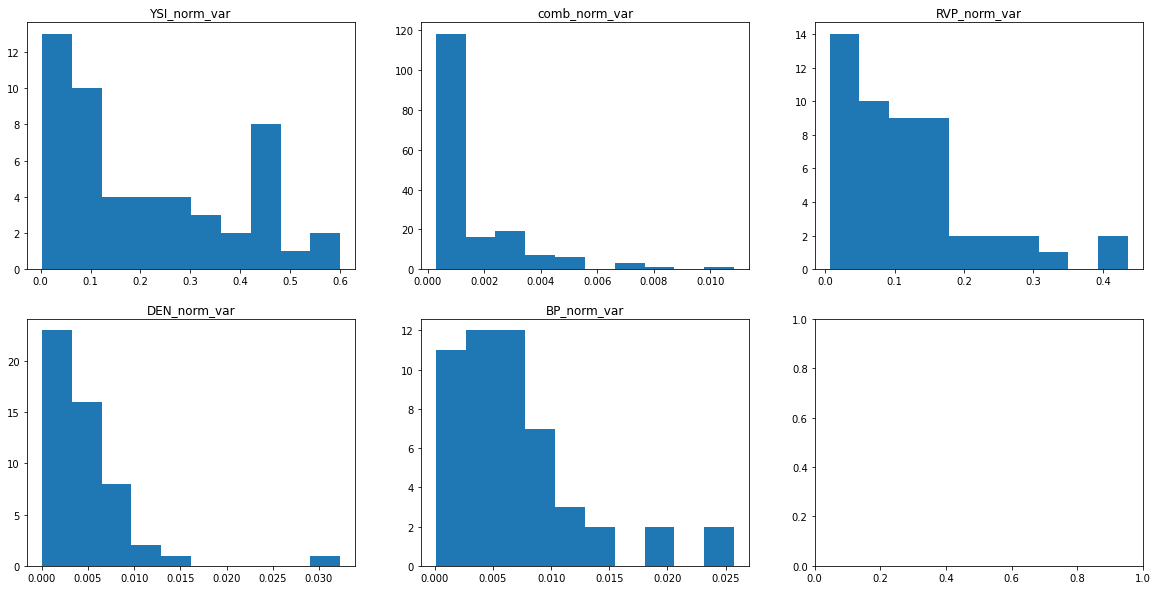

In [12]:
fig, axs = plt.subplots(2, 3,figsize=(20,10))
axs[0, 0].hist(variation_(df_YSI))
axs[0, 0].set_title('YSI_norm_var')

axs[0, 1].hist(variation_(df_comb_h))
axs[0, 1].set_title('comb_norm_var')

axs[0, 2].hist(variation_(df_RVP))
axs[0, 2].set_title('RVP_norm_var')

axs[1, 0].hist(variation_(df_Density))
axs[1, 0].set_title('DEN_norm_var')

axs[1, 1].hist(variation_(df_bp))
axs[1, 1].set_title('BP_norm_var')

### Combustion heat Hc° kJ/kg

In [13]:
# Largest deviation in 
df_comb_h[df_comb_h['Smiles']==df_comb_h[df_comb_h.duplicated(subset=['Smiles'])]['Smiles'].values[np.argmax(variation_(df_comb_h))]]

,Smiles,?Hc°(KJ/kg)
36,C=CC(C)C(C)C,42795.98464
44,C=CC(C)C(C)C,43733.98443


In [14]:
# According to above distr plot and values for the largets deviation for combustion heat:
#  -----> take average values in repeating smiles entries 

df_comb_h = df_comb_h.groupby('Smiles').mean()

In [15]:
def large_var_df(df,threshold):
    
    '''Function takes dataframe and threshold
    returns duplicates with normilised varience larger then threshold'''
    
    smiles_duplicates    = df[df.duplicated(subset=['Smiles'])]['Smiles'].values
    large_var            = smiles_duplicates[np.where(np.array(variation_(df))>threshold)[0]]
    new_df               = pd.concat([df[df['Smiles']==x] for x in large_var])
    
    return new_df

array([[<AxesSubplot:title={'center':'?Hc°(KJ/kg)'}>]], dtype=object)

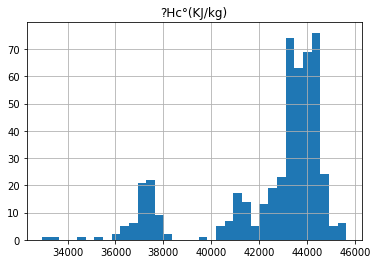

In [16]:
df_comb_h.hist(bins=35)

In [17]:
df_comb_h.to_csv(r'C:\Users\zcemg08\PycharmProjects\biofuels\cleaned_data\comb_heat.csv')

### Boiling Point  K 

In [18]:
bp_smiles_duplicates = df_bp[df_bp.duplicated(subset=['Smiles'])]['Smiles'].values

df_bp[df_bp['Smiles']==bp_smiles_duplicates[np.argmax(variation_(df_bp))]]

,Smiles,Boiling Point (K)
147,CC1=C(C)CCC1,375.318678
93,CC1=C(C)CCC1,356.482861


In [19]:
#### Show compunds with the normilised variation greater then 0.01
df_bp_var             = large_var_df(df_bp,0.01)
names                 = df[['Compound','Smiles']].drop_duplicates(subset='Smiles')
df_bp_var['Name']     = df_bp_var['Smiles'].apply(lambda x:names[names['Smiles']==x].Compound.values[0] )

df_bp_var

,Smiles,Boiling Point (K),Name
17,C=CCC(C)(C)C,356.812490,"4,4-Dimethyl-1-pentene"
34,C=CCC(C)(C)C,338.973233,"4,4-Dimethyl-1-pentene"
0,CC(C)CC(C)C,349.689912,"2,4-Dimethylpentane"
39,CC(C)CC(C)C,358.771521,"2,4-Dimethylpentane"
14,C=C(C)C(C)(C)C,363.914747,"2,3,3-Trimethyl-1-butene"
41,C=C(C)C(C)(C)C,349.751186,"2,3,3-Trimethyl-1-butene"
160,C=C(C)C(C)C=C,370.644974,"2,3-Dimethyl-1,4-pentadiene"
45,C=C(C)C(C)C=C,356.021477,"2,3-Dimethyl-1,4-pentadiene"
21,CC1(C)CCCC1,369.244465,"1,1-Dimethylcyclopentane"
60,CC1(C)CCCC1,360.984281,"1,1-Dimethylcyclopentane"


In [20]:
# 4,4-Dimethyl-1-pentene       C=CCC(C)(C)C      bp = 71.3-73 
# 2,4-Dimethylpentane          CC(C)CC(C)C       bp = 353.644
# 2,3,3-Trimethyl-1-butene     C=C(C)C(C)(C)C    bp = 351.041 https://app.knovel.com/web/folder-share.v?guid=yMGnkAl2FzMI1aIE
# 2,3-Dimethyl-1,4-pentadiene  C=C(C)C(C)C=C     neither dippr nor website --> take average (370.644974+356.021477)/2= 363.3332255
# 1,1-Dimethylcyclopentane     CC1(C)CCCC1       bp = 361 
# 1,2-Dimethylcyclopentene     CC1=CC=CC=C1      bp = 105.8 deg = 
# toluene                      CC1=CC=CC=C1	     bp = 110.62 deg
# 2,4,4-trimethyl-1-pentene    C=C(C)CC(C)(C)C   bp = 374.59k 
# styrene                      C=CC1=CC=CC=C1    bp = 418.31

temp = [72+274,353.644,351.041,363.3332255,361,105.8+274,110.62+274,374.59,418.31]

fixed_df                  = df_bp_var.drop_duplicates(subset='Smiles')
fixed_df['Boiling Point (K)'] = temp

C:\Users\zcemg08\Miniconda3\envs\biofuel\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [21]:
df_boiling_point           = df_bp.groupby('Smiles').mean()
df_boiling_point           = df_boiling_point.reset_index()

In [22]:
fixed_df[fixed_df['Smiles']=='C=C(C)C(C)(C)C']

,Smiles,Boiling Point (K),Name
14,C=C(C)C(C)(C)C,351.041,"2,3,3-Trimethyl-1-butene"


In [23]:
df_boiling_point[df_boiling_point['Smiles']=='C=C(C)C(C)(C)C']

,Smiles,Boiling Point (K)
72,C=C(C)C(C)(C)C,356.832966


In [24]:
df_boiling_point.loc[df_boiling_point['Smiles'].isin(fixed_df['Smiles']),'Boiling Point (K)'] = 0
merged                    = df_boiling_point.merge(fixed_df[['Smiles','Boiling Point (K)']],on='Smiles',how='left')
merged['Boiling_point_K'] = np.max(merged[[list(merged)[1],list(merged)[2]]],axis=1)
merged                    = merged.drop(labels=[list(merged)[1],list(merged)[2]], axis=1)

In [25]:
# Check if merged data frame use substituted values 
merged[merged['Smiles']=='C=C(C)C(C)(C)C']

,Smiles,Boiling_point_K
72,C=C(C)C(C)(C)C,351.041


In [26]:
df_boiling_point = merged

In [27]:
df_boiling_point.to_csv(r'C:\Users\zcemg08\PycharmProjects\biofuels\cleaned_data\boiling_point.csv')

### Reid vapour pressure  !!!!!! Big problem with such dataset

In [28]:
## Example of large deviations in reid vapour pressure values 
df_RVP[df_RVP['Smiles']=='C=CCC(C)(C)C']

,Smiles,RVP(kPa)
17,C=CCC(C)(C)C,36.134518
34,C=CCC(C)(C)C,27.314861


# Viscosity 

In [3]:
df_viscosity = pd.read_csv(r'C:\Users\zcemg08\PycharmProjects\biofuels\raw_data\viscosity_cleaned.csv')

In [4]:
df_viscosity.head(3)

,Family,Name,SMILES,Set,T (K),Exp. Viscosity (Pa.s),Pred. Viscosity (Pa.s),A,F,G,...,X13,X18,X20,Y1,Y2,Y5,Y14,Y15,Y17,Y23
0,Alcohols,1-butanol,CCCCO,Validation,193.1,0.2176,0.29235,74.1,2233.3,-17.7,...,-0.011288,0.147335,24.600061,10,1,0,0,0,1,0
1,Alcohols,1-butanol,CCCCO,Training,203.1,0.1058,0.14379,74.1,2233.3,-17.7,...,-0.011288,0.147335,24.600061,10,1,0,0,0,1,0
2,Alcohols,1-butanol,CCCCO,Training,213.1,0.0578,0.07659,74.1,2233.3,-17.7,...,-0.011288,0.147335,24.600061,10,1,0,0,0,1,0


In [5]:
len(df_viscosity)

2793

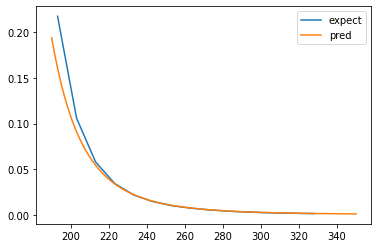

In [31]:
#plot pedicted vs  fitted Guzman-Andrade equation fitted equation of viscosity for 1-butanol

def vis_(T):
    A = 74.12 
    F = df_viscosity[df_viscosity['SMILES']=='CCCCO']['F'].mean()
    G = df_viscosity[df_viscosity['SMILES']=='CCCCO']['G'].mean()
    return A*np.exp(F/T+G)

butanol = df_viscosity[df_viscosity['SMILES']=='CCCCO']
plt.plot(butanol['T (K)'],butanol['Exp. Viscosity (Pa.s)'],label='expect')
plt.plot(np.linspace(190,350,100),[vis_(x) for x in np.linspace(190,350,100)],label='pred')
plt.legend()
plt.show()

### Dynamic Viscosity for 1-butanol given from KNOVEL = 0.000384462


https://app.knovel.com/kn/search?include_synonyms=off&query=1-butanol

In [32]:
butanol = 'CCCCO'
A = 74.12 
F = df_viscosity[df_viscosity['SMILES']==butanol]['F'].mean()
G = df_viscosity[df_viscosity['SMILES']==butanol]['G'].mean()
print('Temperature estimate for 1-Butanol knovel data = {}'.format(F/(np.log(0.000384462/A)-G)))

Temperature estimate for 1-Butanol knovel data = 403.80432784766214


<AxesSubplot:>

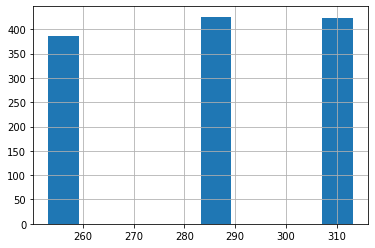

In [33]:
### Plot temperatures used for predictions 

df_viscosity[df_viscosity['Set']=='Prediction']['T (K)'].hist()

### 40 deg used for viscosity and 15deg used for density Table 1 (Fuel Phys Prop vs Cetane)

https://www.fev.com/fileadmin/user_upload/Media/TechnicalPublications/Diesel_Systems/2011-01-0333_Relationship_between_fuel_properties_and_sensitivity_analysis_of_non-aromatic_and_aromatic_fuels_used_in_a_single_cylin.pdf


###  Training data common most common temperature values

In [34]:
print('common temperatures with exact visc val. = {}'.format(Counter(df_viscosity[df_viscosity['Set']!='Prediction']['T (K)']).most_common(6)))

common temperatures with exact visc val. = [(293.1, 122), (298.1, 101), (303.1, 78), (313.1, 67), (333.1, 58), (273.1, 51)]


In [35]:
print('Number of unique compounds in dataset = {}'.format(len(set(df_viscosity[df_viscosity['Set']!='Prediction']['SMILES']))))

Number of unique compounds in dataset = 211


<AxesSubplot:>

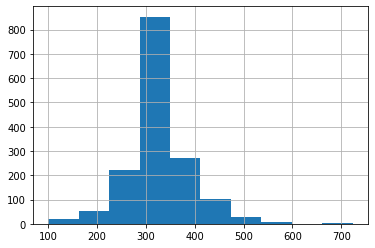

In [36]:
### Distribution of tempretaures in training set

df_viscosity[df_viscosity['Set']!='Prediction']['T (K)'].hist()

In [37]:
### Calculate error between fitted Guzman-Andrade equation and table viscosity values

def vis_row(X):
    T = X[0]
    A = X[1]
    F = X[2]
    G = X[3]
    return A*np.exp(F/T+G)

#### F and G initialised by joback method

def error(X):
    true_ = X[0]
    pred  = X[1]
    return abs(true_-pred)/true_

df_viscosity['visc_pred'] = df_viscosity[['T (K)','A','F','G']].apply(vis_row,axis=1)
df_viscosity['error']     = df_viscosity[['Exp. Viscosity (Pa.s)','visc_pred']].apply(error ,axis=1)

### Investigate prediction errors between Guzman-Andrade equation and Viscosity at 293.1K

In [38]:
x = len(df_viscosity.loc[(df_viscosity['T (K)']==293.1) & (df_viscosity['Set']!='Prediction')])
y = len(df_viscosity.loc[(df_viscosity['T (K)']==293.1) & (df_viscosity['Set']!='Prediction') & (df_viscosity['error']<0.05)])
print('ratio of compounds with relative error < 5% is equal to = {}'.format(y/x))

ratio of compounds with relative error < 5% is equal to = 0.2459016393442623


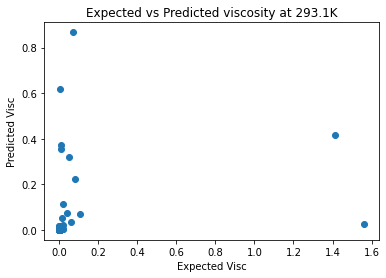

In [39]:
### Plot predictions vs expectations 
df_ = df_viscosity.loc[(df_viscosity['T (K)']==293.1) & (df_viscosity['Set']!='Prediction')]
plt.scatter(df_['Exp. Viscosity (Pa.s)'].values,df_['visc_pred'].values)
plt.xlabel('Expected Visc')
plt.ylabel('Predicted Visc') 
plt.title('Expected vs Predicted viscosity at 293.1K')
plt.show()

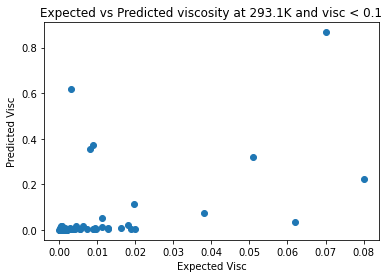

In [40]:
### Plot predictions vs expectations for viscosity values <0.1 (i.e lower left corner of the above plot zoom)
df_ = df_viscosity.loc[(df_viscosity['T (K)']==293.1) & (df_viscosity['Set']!='Prediction') & (df_viscosity['Exp. Viscosity (Pa.s)']<0.1)]
plt.scatter(df_['Exp. Viscosity (Pa.s)'].values,df_['visc_pred'].values)
plt.xlabel('Expected Visc')
plt.ylabel('Predicted Visc') 
plt.title('Expected vs Predicted viscosity at 293.1K and visc < 0.1')
plt.show()

### Conclusion:  Fitted Guzman-Andrade equation is unrealiable for viscosity calculations, based on analysis done for viscosity values at 293.1 K 

# Density 

### Comparison of 3,3-Dimethylpentane density with knovel = 0.693
#### https://app.knovel.com/kn/search?content_type=igraph%2Citable&include_synonyms=off&query=3%2C3-dimethylpentane


In [41]:
df[df['Smiles']=='CCC(C)(C)CC']

,Compound,Smiles,RON,MON,YSI,?Hc°(KJ/L),?Hc°(KJ/kg),RVP(kPa),Density (g/mL),Boiling Point (K),UB(mol/L)
3,"3,3-Dimethylpentane",CCC(C)(C)CC,88.935130,91.989959,18.105944,30283.40019,44476.16394,22.833933,0.680891,357.408846,None
50,"3,3-dimethylpentane",CCC(C)(C)CC,81.512943,87.993361,47.835493,30165.35902,44551.60713,20.932764,0.677088,361.633436,0
30,"3,3-dimethylpentane",CCC(C)(C)CC,81.512943,87.993361,47.835493,30189.40057,44587.11441,20.932764,0.677088,361.633436,0


In [42]:
### print compunds with varience in values larger then 0.01*mu, where mu is the duplicated mean 
df_repeat_density             = large_var_df(df_Density,0.01)
df_repeat_density['Compound'] = df_repeat_density['Smiles'].apply(lambda x: df[df['Smiles']==x]['Compound'].iloc[0])
df_repeat_density

,Smiles,Density (g/mL),Compound
0,CC(C)CC(C)C,0.673174,"2,4-Dimethylpentane"
39,CC(C)CC(C)C,0.689361,"2,4-Dimethylpentane"
160,C=C(C)C(C)C=C,0.740328,"2,3-Dimethyl-1,4-pentadiene"
45,C=C(C)C(C)C=C,0.723975,"2,3-Dimethyl-1,4-pentadiene"
31,C=C(C)C(C)CC,0.723509,"2,3-Dimethyl-1-pentene"
52,C=C(C)C(C)CC,0.702269,"2,3-Dimethyl-1-pentene"
48,C1=CC=CC=C1,0.880224,benzene
12,C1=CC=CC=C1,0.825138,benzene


In [43]:
df_repeat_density.loc[df_repeat_density['Smiles']=='C=C(C)C(C)C=C','Density (g/mL)'].mean()

0.7321511304999999

In [44]:
### Use KNOVEL data for compunds with std > 0.01m, where m is the mean of repeating compunds 
### 2,4-Dimethylpentane             CC(C)CC(C)C     0.673  (the same as in table)
### 2,3-Dimethyl-1,4-pentadiene     C=C(C)C(C)C=C   0.7321511304999999 - no data --> mean was taken instead 
### 2,3-Dimethyl-1-pentene          C=C(C)C(C)CC    0.7009 https://app.knovel.com/kn/search?content_type=igraph%2Citable&include_synonyms=off&query=2%2C3-Dimethyl-1-pentene
### benzene                         C1=CC=CC=C1     0.873

df_density_corrected                    = df_repeat_density.drop_duplicates(subset='Smiles')
corrected_density                       = [0.673,0.7321511304999999,0.7009,0.873]
df_density_corrected['Density_correct'] = corrected_density

C:\Users\zcemg08\Miniconda3\envs\biofuel\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [45]:
df_density_corrected

,Smiles,Density (g/mL),Compound,Density_correct
0,CC(C)CC(C)C,0.673174,"2,4-Dimethylpentane",0.673000
160,C=C(C)C(C)C=C,0.740328,"2,3-Dimethyl-1,4-pentadiene",0.732151
31,C=C(C)C(C)CC,0.723509,"2,3-Dimethyl-1-pentene",0.700900
48,C1=CC=CC=C1,0.880224,benzene,0.873000


In [46]:
df_Density.loc[df_Density['Smiles'].isin(df_density_corrected['Smiles']),'Density (g/mL)'] = 0
merged = df_Density.merge(df_density_corrected[['Smiles','Density_correct']],on='Smiles',how='left')
merged['Density (g/mL)'] = np.max(merged[[list(merged)[1],list(merged)[2]]],axis=1)


In [47]:
df_Density = merged

In [48]:
df_Density.to_csv(r'C:\Users\zcemg08\PycharmProjects\biofuels\cleaned_data\density.csv')

### Entropy and Heat Capacity 

In [49]:
#### data source - https://www.sciencedirect.com/science/article/pii/S2666546821000082

df_entropy_heat = pd.read_csv(r'C:\Users\zcemg08\PycharmProjects\biofuels\raw_data\entropy_heat_capacity.csv')

#### alternative entropy data source:

# https://app.knovel.com/web/view/itable/show.v/rcid:kpYCPDCECD/cid:kt00BKANV1/viewerType:eptble//root_slug:Table-79-Entropy-of-Gas---Organic-Compounds-DeltaS--A--B-T--C-T-sup2sup--D-T-sup3sup--E-T-sup4sup/url_slug:table-79-entropy-gas?b-q=4-ethylheptane%20ENTROPY&include_synonyms=no&q=4-ethylheptane%20ENTROPY&sort_on=default&start=0&columns=1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17

In [50]:
df_entropy_heat.head(3)

,No.,Hydrocarbon,SMILES,HeatCapacity,Entropy,MW,AMW,nTA,RBF,nDB,...,CATS3D_15_LL,CATS3D_18_LL,Unnamed: 257,Unnamed: 258,Unnamed: 259,Unnamed: 260,Unnamed: 261,MW.1,Unnamed: 263,1
0,1,Ethylene,C=C,42.90,219.18,28.06,4.676667,2,0.0,1,...,0,0,NaN,NaN,NaN,NaN,NaN,AMW,NaN,2.0
1,2,Ethane,CC,52.47,229.45,30.08,3.760000,2,0.0,0,...,0,0,NaN,NaN,NaN,NaN,NaN,nTA,NaN,3.0
2,3,Allene,C=C=C,59.03,243.70,40.07,5.724286,2,0.0,2,...,0,0,NaN,NaN,NaN,NaN,NaN,RBF,NaN,4.0


In [51]:
'Number of duplicated by smiles rows in entropy/heat_capacity dataset = {}'.format(df_entropy_heat.duplicated(subset='SMILES').sum())

'Number of duplicated by smiles rows in entropy/heat_capacity dataset = 1'

In [52]:
### Print the only duplicate in entropy/heat capacity datset
df_entropy_heat.loc[df_entropy_heat['SMILES']=='CCCC(CC)CCC']

,No.,Hydrocarbon,SMILES,HeatCapacity,Entropy,MW,AMW,nTA,RBF,nDB,...,CATS3D_15_LL,CATS3D_18_LL,Unnamed: 257,Unnamed: 258,Unnamed: 259,Unnamed: 260,Unnamed: 261,MW.1,Unnamed: 263,1
271,272,4-ethylheptane,CCCC(CC)CCC,213.3,495.47,128.29,4.423793,3,0.178571,0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
272,273,"2,2-dimethylheptane",CCCC(CC)CCC,211.3,472.33,128.29,4.423793,3,0.178571,0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
### entropy of       4-ethylheptane	CCCC(CC)CCC  = 495.47  (at 298K) https://app.knovel.com/web/view/itable/show.v/rcid:kpYHTPHC09/cid:kt005XWOO5/viewerType:eptble//root_slug:Entropies-of-Gases---Organic-Compounds/url_slug:entropies-gases-organic?b-q=4-Ethylheptane%20entropy&include_synonyms=no&q=4-Ethylheptane%20entropy&sort_on=default&start=0&columns=1,2,3,4,5,6,7,8,9,10,11,12,13,14,15&selected=kr0742EX76
### heat capacity of 4-ethylheptane	CCCC(CC)CCC  = accept what it is   

df_entropy_heat = df_entropy_heat.drop(272,axis=0)

In [54]:
#Final check
df_entropy_heat.duplicated(subset='SMILES').sum()

0

In [55]:
df_entropy_heat.to_csv(r'C:\Users\zcemg08\PycharmProjects\biofuels\cleaned_data\entropy_heat_capacity.csv')

### Autoignition temperature 

In [56]:
#### data source from https://link.springer.com/article/10.1007/s13738-012-0192-2

df_auto = pd.read_csv(r'C:\Users\zcemg08\PycharmProjects\biofuels\raw_data\autoignition_temp.csv',encoding='cp1252')

In [57]:
df_auto = df_auto.drop(['No.'],axis=1)
df_auto = df_auto[df_auto['Exp'].notnull()]
df_auto.head(5)

,Hydrocarbon name,Exp,New,Dev,Albahri,Dev.1,Albahri–George,Dev.2,Chen et al.,Dev.3
0,Methane,868 [23],859.0,?9,780,?88,730,?138,750,?118
1,Propane,723 [22],726.0,3,680,?43,640,?83,673,?50
2,Butane,645 [4],660.0,15,632,?13,611,?34,643,?2
3,2-Methylpropane,"733 [22, 23]",734.0,1,701,?32,648,?85,680,?53
4,Pentane,538 [4],506.0,?32,586,48,581,43,614,76


In [58]:
def CIRconvert(ids):
    try:
        url = 'http://cactus.nci.nih.gov/chemical/structure/' + quote(ids) + '/smiles'
        ans = urlopen(url).read().decode('utf8')
        return ans
    except:
        return 'Did not work'
    
def prop_ref(row):
    val = row['Exp'].split()
    
    temp = float(val[0])
    ref  = int(val[1][1:-1])
    
    return temp, ref
    

In [59]:
df_auto[['Temp','Ref']] = df_auto.apply(prop_ref, axis=1, result_type="expand")
df_auto['SMILES']       = df_auto['Hydrocarbon name'].apply(CIRconvert)
df_auto['Split']        = 'Test'
df_auto.iloc[:249,-1]   = 'Train'

In [62]:
df_auto.loc[(df_auto['SMILES']=='Did not work')] 

,Hydrocarbon name,Exp,New,Dev,Albahri,Dev.1,Albahri–George,Dev.2,Chen et al.,Dev.3,Temp,Ref,SMILES,Split
59,Nonadecae,478 [23],475.0,?3,383,?95,526,48,660,182,478.0,23.0,Did not work,Train
112,2-Methylbutadiene(isoprene),493 [23],589.0,96,647,154,581,88,601,108,493.0,23.0,Did not work,Train
133,"3,3-Dimethyl L-1-butene",630 [22],598.0,?33,729,99,672,42,660,30,630.0,22.0,Did not work,Train
220,"1,2,3-Trimethyl-4-ethylbenzne",766 [22],701.0,?65,771,5,720,?46,705,?61,766.0,22.0,Did not work,Train


In [64]:
# Nonadecane                    CCCCCCCCCCCCCCCCCCC     https://pubchem.ncbi.nlm.nih.gov/compound/12401#section=Canonical-SMILES
# 2-Methylbutadiene(isoprene)   CC(=C)C=C               https://pubchem.ncbi.nlm.nih.gov/compound/6557#section=InChI-Key
# 3,3-Dimethyl L-1-butene       CC(C)(C)C=C             https://pubchem.ncbi.nlm.nih.gov/compound/11210#section=InChI-Key
# 1,2,3-Trimethyl-4-ethylbenzne CCC1=C(C(=C(C=C1)C)C)C  https://pubchem.ncbi.nlm.nih.gov/compound/187815


df_auto.iloc[(df_auto['SMILES']=='Did not work').values,-2] = ['CCCCCCCCCCCCCCCCCCC','CC(=C)C=C','CC(C)(C)C=C','CCC1=C(C(=C(C=C1)C)C)C']


In [65]:
df_auto.to_csv(r'C:\Users\zcemg08\PycharmProjects\biofuels\cleaned_data\autoignition_temp.csv')